In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\titanic_train.txt")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


From the above column,
- Passengerid,name,ticket is not necessary
- Encode sex and embarked
- Concat sibSp and parch as family

In [3]:
data = data.drop(['PassengerId','Name','Ticket'], axis = 1)

### Problem Statement

The dataFrame gives information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.


### Solution

We have to predict if an arbitrary passenger on Titanic would survive the sinking or not.
- Embarked - where the traveller mounted from
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- cabin - Cabin number 

## Statistical Inference

In [4]:
data.shape

(891, 9)

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Treat the age with mean
- cabin column has only less than 25% data. Since we are having PClass data, we can drop cabin
- Remove the embarked null values

#### Treating NaN values and concatinating 2 columns

In [7]:
data = data.drop(['Cabin'],axis = 1)

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [9]:
data.dropna(inplace=True)

In [10]:
data['Family'] = data['SibSp']+data['Parch']
data.drop(columns = ['SibSp','Parch'], axis=1,inplace=True)

In [11]:
data.describe()

,Survived,Pclass,Age,Fare,Family
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,32.096681,0.906637
std,0.486260,0.834700,12.968366,49.697504,1.614703
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.895800,0.000000
50%,0.000000,3.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    object 
 6   Family    889 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


Encode sex and embarked

## Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [14]:
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

- 0 for female and 1 for male in Sex
- 0 for C,1 for S and 2 for Q in Embarked

In [15]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


## EDA
### Correlation

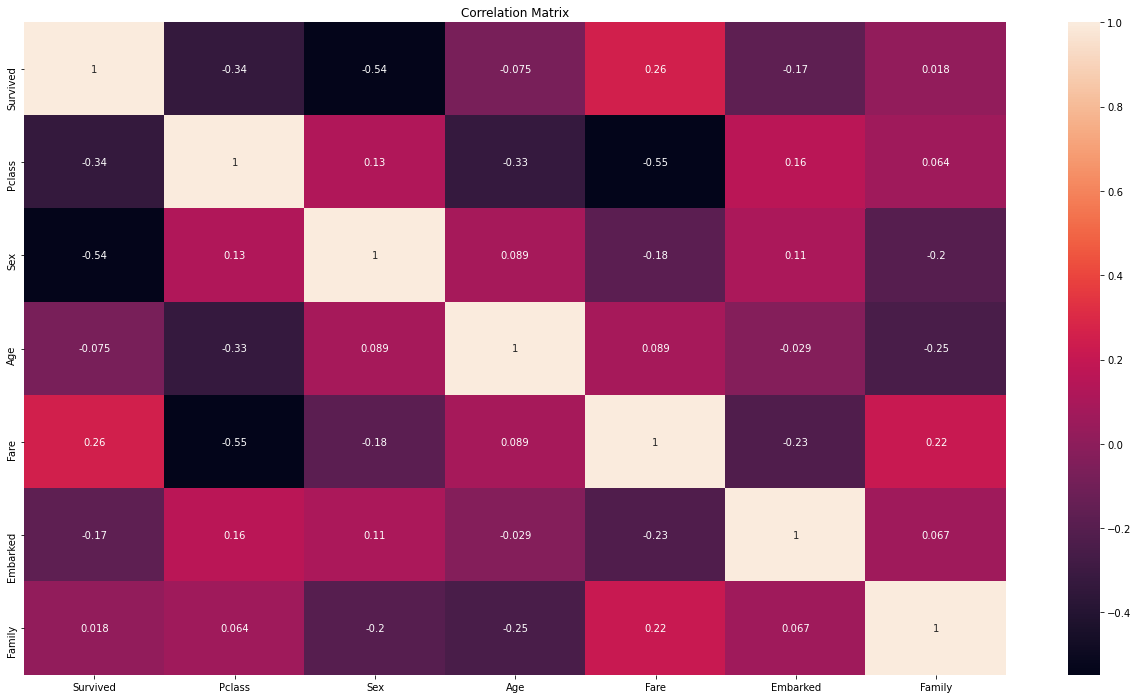

In [16]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

## Check for collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

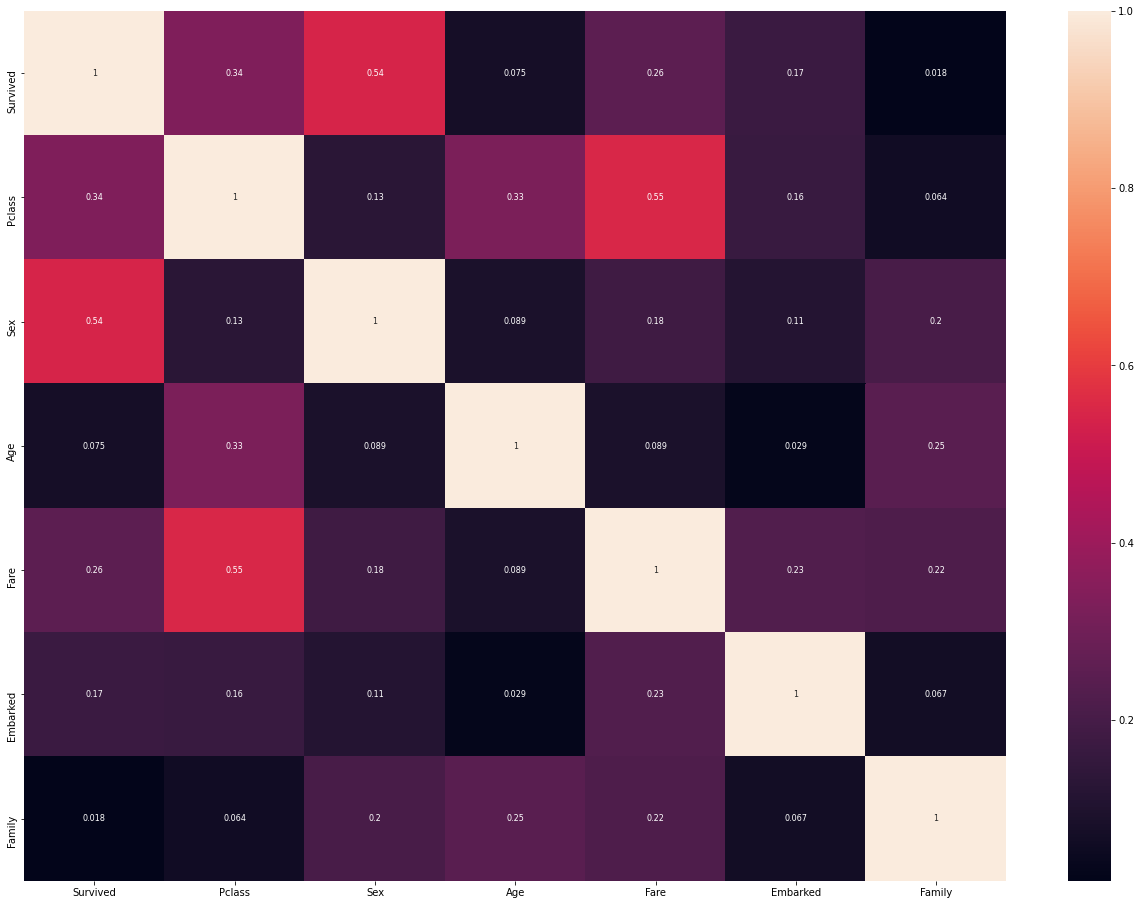

In [18]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,16))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no collinearity between variables

From the above data, it looks like there is no strong positively or negatively correlated variables
### Data Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

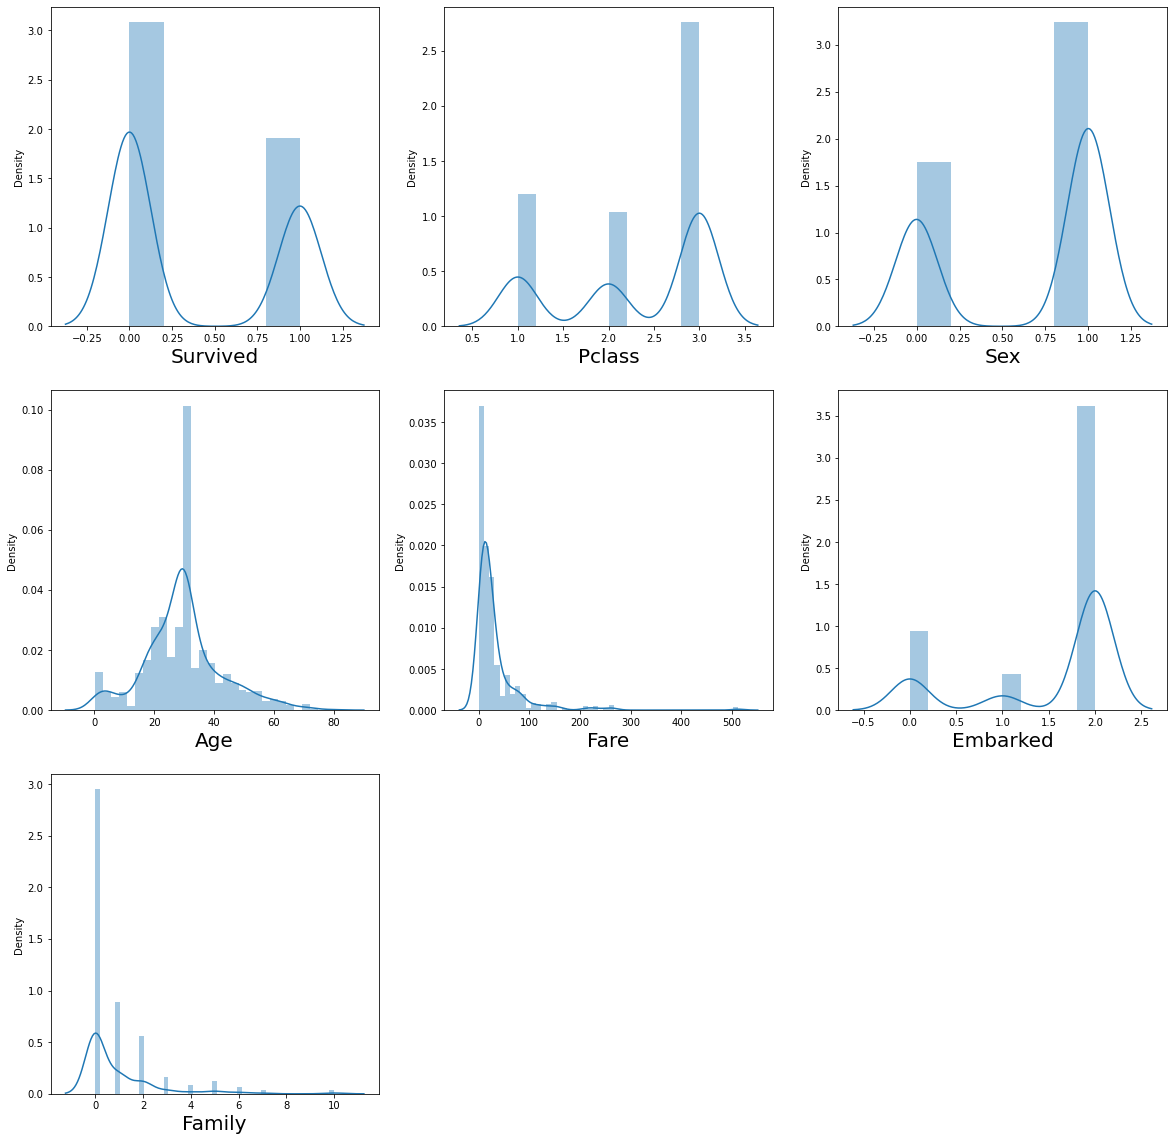

In [19]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=9:
        ax =  plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

There is skewness in Fare and Family column. Otherwis ethe dataframe looks fairly distributed

### Checking and Treat Outliers

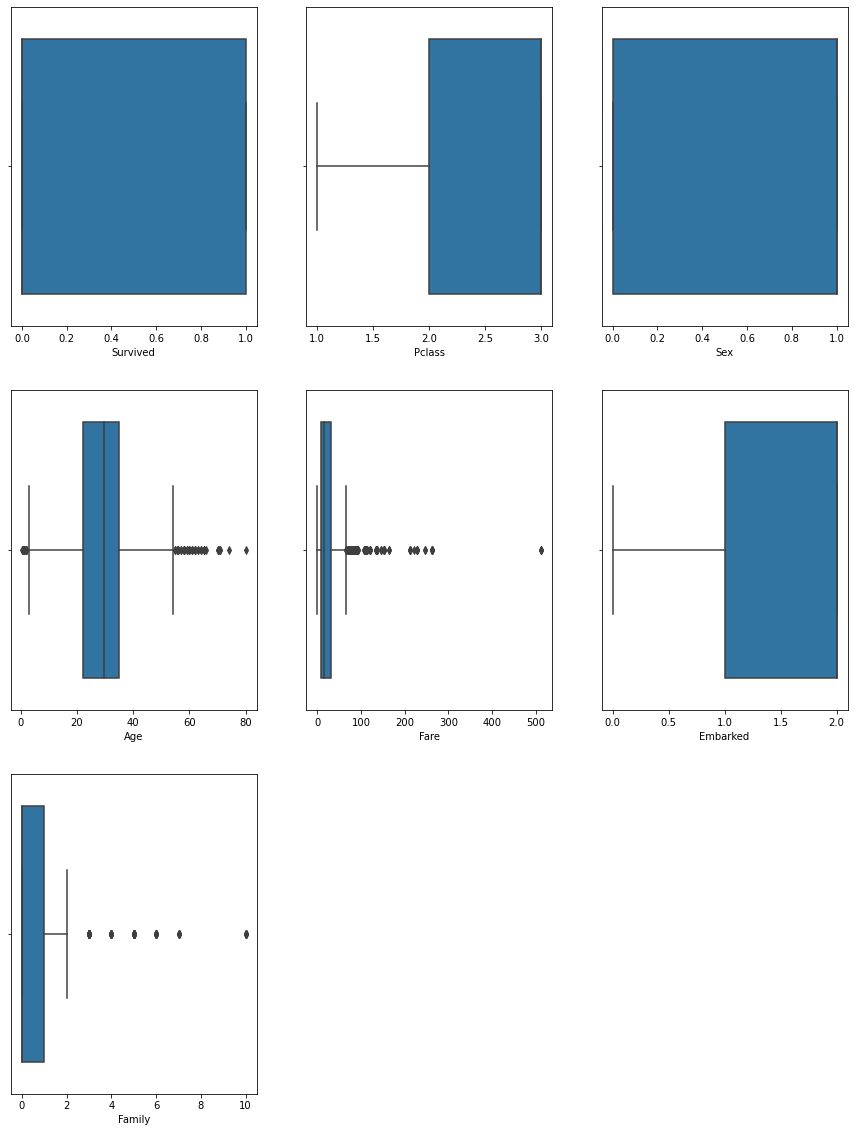

In [20]:
plt.figure(figsize=(15,20))
graph = 1
for column in data:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

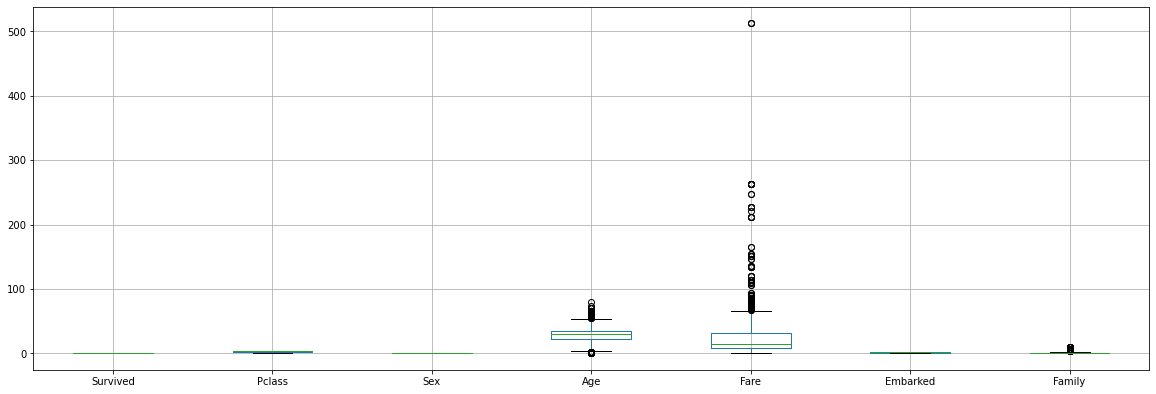

In [21]:
data.iloc[:,:].boxplot(figsize = [20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

Outliers are more in age and family. Check the zscore

In [22]:
from scipy.stats import zscore

In [23]:
data['age_zscore'] = zscore(data['Age'])
data['is_outlier'] = data['age_zscore'].apply(lambda x: x <= -3 or x >= 3)
data[data['is_outlier']]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,age_zscore,is_outlier
96,0,1,1,71.0,34.6542,0,0,3.190057,True
116,0,3,1,70.5,7.7500,1,0,3.151480,True
493,0,1,1,71.0,49.5042,0,0,3.190057,True
630,1,1,1,80.0,30.0000,2,0,3.884444,True
672,0,2,1,70.0,10.5000,2,0,3.112903,True
745,0,1,1,70.0,71.0000,2,2,3.112903,True
851,0,3,1,74.0,7.7750,2,0,3.421519,True


In [24]:
data['fare_zscore'] = zscore(data['Fare'])
data['is_outlier'] = data['fare_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,age_zscore,is_outlier,fare_zscore
27,0,1,1,19.000000,263.0000,2,5,-0.821957,True,4.648791
88,1,1,0,23.000000,263.0000,2,5,-0.513341,True,4.648791
118,0,1,1,24.000000,247.5208,0,1,-0.436187,True,4.337147
258,1,1,0,35.000000,512.3292,0,0,0.412509,True,9.668551
299,1,1,0,50.000000,247.5208,0,1,1.569820,True,4.337147
311,1,1,0,18.000000,262.3750,0,4,-0.899111,True,4.636208
341,1,1,0,24.000000,263.0000,2,5,-0.436187,True,4.648791
377,0,1,1,27.000000,211.5000,0,2,-0.204724,True,3.611938
380,1,1,0,42.000000,227.5250,0,0,0.952587,True,3.934570
438,0,1,1,64.000000,263.0000,2,5,2.649978,True,4.648791


Since there are more values greater than the zscore, check for skewness

### Skewness

In [25]:
print('skewness value of Age: ',data['Age'].skew())
print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Age:  0.43172026491227716
skewness value of Fare:  4.801440211044194


Skewness must be within -1 to +1 for normal distribution. Skewness value of Fare is higher. So, treat that

In [26]:
q1 = data['Fare'].quantile (0.25)
q3 = data['Fare'].quantile (0.75)
iqr = q3 - q1

In [27]:
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
data['Fare'] = np.where(data['Fare'] > upper_whisker, upper_whisker , np.where(data['Fare'] < lower_whisker, lower_whisker, data['Fare']))

## Model building

In [28]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

### Finding the relationship between dependent and independent variable

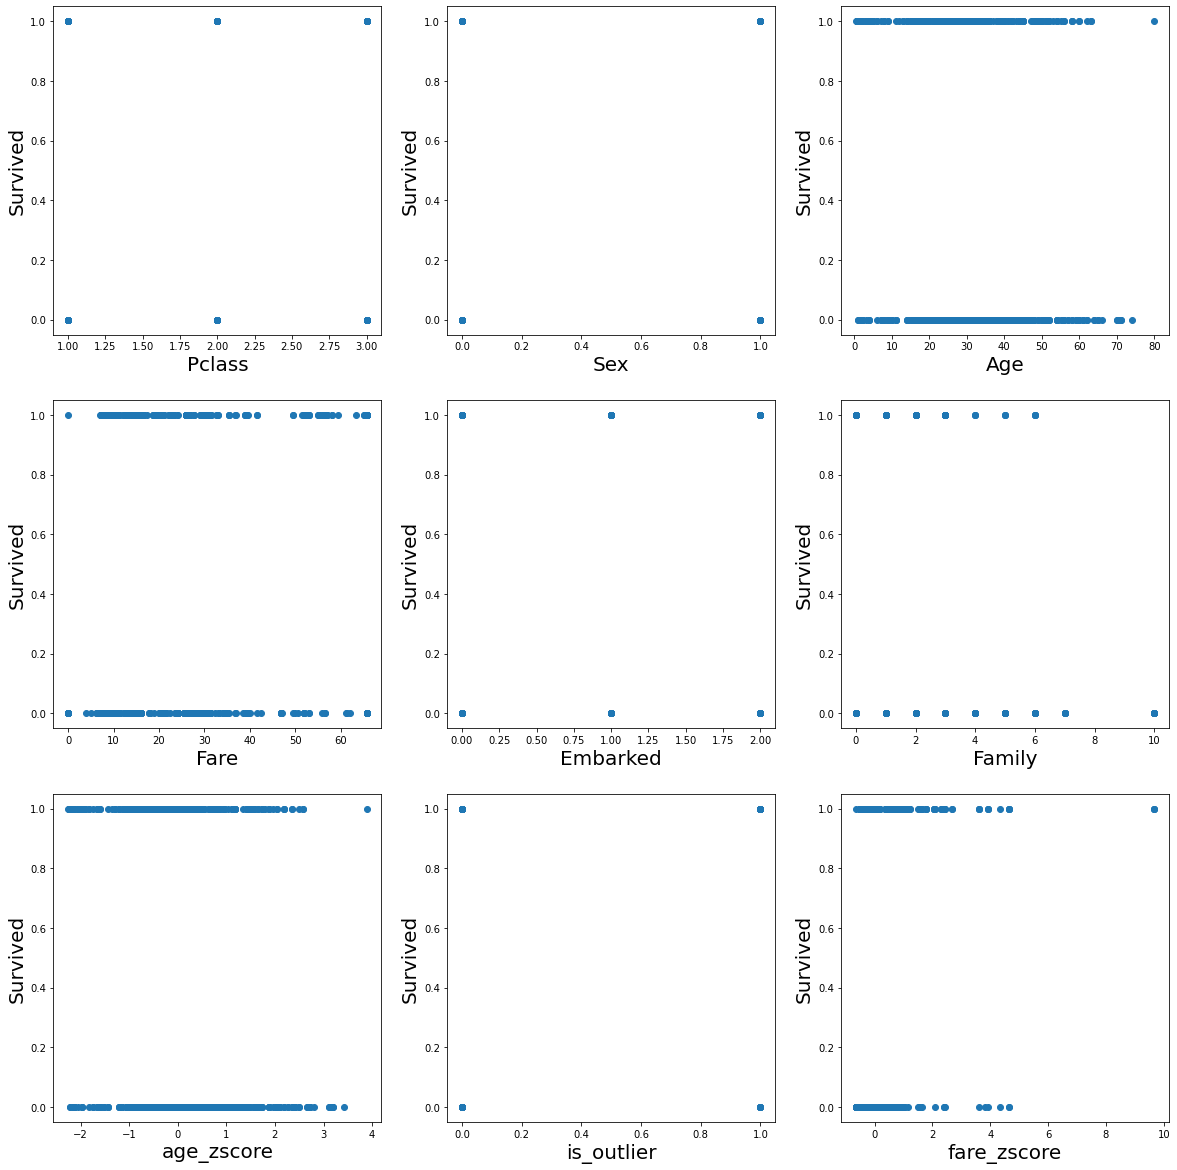

In [29]:
plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Survived', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly ok.

### Standardisation

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x = scaler.fit_transform(x)

#### Finding best random state

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [33]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8707865168539326 on Random State 24


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 24)

## Logistic Regression

In [35]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 87.07865168539325
[[107   9]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       116
           1       0.84      0.77      0.81        62

    accuracy                           0.87       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.87      0.87      0.87       178



## Decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 83.14606741573034
[[100  16]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.75      0.77      0.76        62

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 83.14606741573034
[[100  16]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.75      0.77      0.76        62

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



## SVC

In [38]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 88.20224719101124
[[111   5]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       116
           1       0.90      0.74      0.81        62

    accuracy                           0.88       178
   macro avg       0.89      0.85      0.86       178
weighted avg       0.88      0.88      0.88       178



LR is producing good accuracy. Check overfitting by cross-validation to get which model has most generalised accuracy score

## Cross-Validation
To chek whether overfitting or underfitting

In [39]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.7908197139938713
DT cvs: 0.7795454545454545
RFC cvs: 0.8177860061287028
SVC cvs: 0.8234295199182838


Based on CV score, Random Forest Classifier looks better compared to other scores.

## Hyper parameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
              'random_state' : [24]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 24}

In [42]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8876404494382022

On tuning the parameters, the score has increased to 0.88

## ROC AUC Score

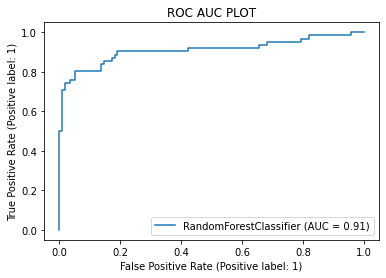

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GVC.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

## Save the model

In [44]:
import joblib
joblib.dump(GVC.best_estimator_,'Titanic_capstone.pkl')

['Titanic_capstone.pkl']

Thus the model is saved